# FAS score distribution

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

### FAS scores of fDOG-Assmebly ortholog supported by all protein-based tools

In [2]:
tools_ref = ['bbh', 'domainoid', 'ensamble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
tools = ['busco_metazoa_augustus_gallus_v2', 'busco_metazoa_metaeuk_gallus_v2', 'fdog_assembly_metazoa_augustus_gallus_v2', 'fdog_assembly_metazoa_metaeuk_gallus_v2']
path = '../../results/qfo_input/'

In [3]:
def create_set_of_sets(path):
    file = open(path, 'r')
    pairs_set = set()
    lines = file.readlines()
    for line in lines:
        line = line.rstrip()
        pairs = frozenset(line.split('\t'))
        pairs_set.add(pairs)
    #print(len(lines))
    print(len(pairs_set))
    return pairs_set

In [4]:
list_of_sets_ref = []
dict_of_sets = {}
nr_orthologs_ref = []
for i in tools_ref:
    pairs_set = create_set_of_sets(path + i + '.tsv')
    list_of_sets_ref.append(pairs_set)
    dict_of_sets[i] = pairs_set
    nr_orthologs_ref.append(len(pairs_set))

8738
8945
8168
8422
8487
8979
7973
8616
9372
9006
8906
8606
9126


In [5]:
# Create set of all occuring pairs for FAS calculation
intersection_all = set.intersection(*list_of_sets_ref)
print(len(list_of_sets_ref))
print(len(intersection_all))

13
5669


In [6]:
#get seed genes
seed_file = open('../uniprotid_to_group_assignment/mapping_busco_id_uniport_id.tsv', 'r')
lines = seed_file.readlines()
seed_genes = set()
busco_vs_uniprot_dict = {}
for line in lines:
    line = line.rstrip()
    busco_id, uniprot_id = line.split('\t')
    seed_genes.add(uniprot_id)
    busco_vs_uniprot_dict[busco_id] = uniprot_id

In [7]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm, Normalize, PowerNorm

In [8]:
augustus_df_overlap = pd.read_csv('../overlap_tables/fdog_ass_busco_augustus_overlap_gff_files_gallus_v2.tsv', delimiter='\t')
augustus_df_phylo = pd.read_csv('../augustus_busco_core/fdog_assembly_core_busco_metazoa_jul24_augustus.phyloprofile', delimiter='\t')
#prepare tables for merging
display(augustus_df_overlap)
augustus_df_overlap.replace({'transcript': r'.*at33208_'}, {'transcript': ''}, regex=True, inplace=True)
display(augustus_df_overlap)
#display(augustus_df_phylo)
augustus_df_phylo.replace({'ncbiID': r'ncbi'}, {'ncbiID': ''}, regex=True, inplace=True)
augustus_df_phylo['orthoID'] = augustus_df_phylo['orthoID'].str.split('|', expand=True)[2]
augustus_df_phylo = augustus_df_phylo.rename(columns={'geneID': 'GeneID', 'orthoID': 'transcript', 'ncbiID': 'Species'})
#display(augustus_df_phylo)
augustus_df_overlap = augustus_df_overlap.astype({"Species": int})
augustus_df_phylo = augustus_df_phylo.astype({"Species": int})
augustus_df_phylo['transcript'] = augustus_df_phylo['transcript'].str.replace(".","_")
augustus_df_overlap['transcript'] = augustus_df_overlap['transcript'].str.replace(".","_")
#merge tables
merged_df_augustus = pd.merge(augustus_df_phylo, augustus_df_overlap, how="outer", on=["Species", "GeneID", "transcript"], validate="one_to_many")
display(merged_df_augustus)

,Species,GeneID,transcript,overlap,uniprotID,coverage
0,9031,139188at33208,139188at33208_CM000103_5_1_g2.t1,2290.0,F1NHU0,0.996953
1,9031,139188at33208,139188at33208_CM000103_5_1_g2.t1,2214.0,F1NHU0,1.000000
2,9031,139188at33208,139188at33208_CM000103_5_1_g2.t1,2181.0,F1NHU0,0.975839
3,9031,567750at33208,567750at33208_CM000103_5_1_g2.t1,415.0,NaN,1.000000
4,9031,57158at33208,57158at33208_CM000103_5_1_g4.t1,3486.0,A0A1D6UPS9,1.000000
...,...,...,...,...,...,...
14294,8364,273040at33208,273040at33208_NC_030683_2_1_g2.t1,1099.0,A0A8J0SRX4,0.872915
14295,8364,273040at33208,273040at33208_NC_030683_2_1_g2.t1,1227.0,A0A8J1JU74,0.884643
14296,8364,498535at33208,498535at33208_NW_022279441_1_1_g1.t1,229.0,Q6P811,0.677515
14297,8364,560584at33208,560584at33208_NW_022279393_1_1_g1.t1,552.0,A0A8J0QFS4,1.000000


,Species,GeneID,transcript,overlap,uniprotID,coverage
0,9031,139188at33208,CM000103_5_1_g2.t1,2290.0,F1NHU0,0.996953
1,9031,139188at33208,CM000103_5_1_g2.t1,2214.0,F1NHU0,1.000000
2,9031,139188at33208,CM000103_5_1_g2.t1,2181.0,F1NHU0,0.975839
3,9031,567750at33208,CM000103_5_1_g2.t1,415.0,NaN,1.000000
4,9031,57158at33208,CM000103_5_1_g4.t1,3486.0,A0A1D6UPS9,1.000000
...,...,...,...,...,...,...
14294,8364,273040at33208,NC_030683_2_1_g2.t1,1099.0,A0A8J0SRX4,0.872915
14295,8364,273040at33208,NC_030683_2_1_g2.t1,1227.0,A0A8J1JU74,0.884643
14296,8364,498535at33208,NW_022279441_1_1_g1.t1,229.0,Q6P811,0.677515
14297,8364,560584at33208,NW_022279393_1_1_g1.t1,552.0,A0A8J0QFS4,1.000000


,GeneID,Species,transcript,FAS_F,FAS_B,overlap,uniprotID,coverage
0,102804at33208,6239,BX284601_5_1_g8_t1,0.9201,0.9875,3087.0,Q9N5R9,1.000000
1,102804at33208,6239,BX284601_5_2_g6_t1,0.4528,0.9678,1528.0,NaN,0.987080
2,102804at33208,6239,BX284601_5_2_g8_t1,0.9201,0.9875,3087.0,Q9N5R9,1.000000
3,103854at33208,6239,BX284606_5_1_g5_t1,0.4867,0.7300,2269.0,Q19954,1.000000
4,103854at33208,6239,BX284606_5_1_g5_t1,0.4867,0.7300,2693.0,Q19954,1.000000
...,...,...,...,...,...,...,...,...
15247,92367at33208,45351,DS469564_1_1_g2_t1,0.9153,0.6055,728.0,A7S1F4,1.000000
15248,92367at33208,45351,DS469564_1_1_g2_t1,0.9153,0.6055,142.0,A7S1F5,0.091791
15249,9639at33208,45351,DS469572_1_1_g2_t1,0.7905,0.6293,6545.0,NaN,0.935802
15250,9639at33208,45351,DS472342_1_1_g2_t1,0.1015,0.4941,196.0,NaN,0.247788


In [9]:
mapping_seed = open("../uniprotid_to_group_assignment/mapping_busco_id_uniport_id.tsv", "r")
lines = mapping_seed.readlines()
busco_vs_uniprot = {}
for line in lines:
    line = line.rstrip()
    busco, uniprot = line.split('\t')
    busco_vs_uniprot[busco] = uniprot
mapping_seed.close()

In [10]:
isoform = open("../overlap_tables/isoform_mapping.tsv", "r")
isoform_dict = {}
lines = isoform.readlines()
for line in lines:
    line = line.rstrip()
    old, iso = line.split('\t')
    isoform_dict[old] = iso
isoform.close()

In [11]:
def filter_dataframe(cutoff, category, df, busco_to_uniprot, isoform_dict, max_per_gene=True):
    #print(df.head())
    df.drop_duplicates(inplace=True)
    df['GeneID'] = df['GeneID'].map(busco_to_uniprot)
    df['uniprotID'] = df['uniprotID'].map(lambda x: isoform_dict.get(x, x))
    #print(df.head())
    if max_per_gene == True:
        max_values = df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform(max)
        #print(max_values.head())
        max_df = df[df['coverage'] == max_values]
        df = max_df
    filtered_df = df[df[category] >= cutoff].copy()
    #print(filtered_df.head())
    filtered_df.dropna(subset=['GeneID'], inplace=True)
    #print(filtered_df.head())
    return filtered_df.copy()

In [12]:
fa_augustus_sub = filter_dataframe(0.5, 'coverage', merged_df_augustus, busco_vs_uniprot, isoform_dict)
fa_augustus_sub.drop_duplicates(keep='first',inplace=True)
display(fa_augustus_sub)

/tmp/ipykernel_1415551/155838820.py:8: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_values = df.groupby(['Species', 'GeneID', 'transcript'])['coverage'].transform(max)


,GeneID,Species,transcript,FAS_F,FAS_B,overlap,uniprotID,coverage
0,Q9Y5B9,6239,BX284601_5_1_g8_t1,0.9201,0.9875,3087.0,Q9N5R9,1.000000
1,Q9Y5B9,6239,BX284601_5_2_g6_t1,0.4528,0.9678,1528.0,NaN,0.987080
2,Q9Y5B9,6239,BX284601_5_2_g8_t1,0.9201,0.9875,3087.0,Q9N5R9,1.000000
3,P49754,6239,BX284606_5_1_g5_t1,0.4867,0.7300,2269.0,Q19954,1.000000
4,P49754,6239,BX284606_5_1_g5_t1,0.4867,0.7300,2693.0,Q19954,1.000000
...,...,...,...,...,...,...,...,...
15243,Q99460,45351,DS469810_1_1_g2_t1,0.9955,0.9245,2914.0,A7SUA4,0.976869
15244,Q99460,45351,DS476239_1_1_g1_t1,0.4205,0.9657,553.0,A7TCD5,0.932546
15247,Q8IWA0,45351,DS469564_1_1_g2_t1,0.9153,0.6055,728.0,A7S1F4,1.000000
15249,O75165,45351,DS469572_1_1_g2_t1,0.7905,0.6293,6545.0,NaN,0.935802


In [13]:
# Set mit erlaubten frozen sets
allowed_combinations = intersection_all

# Funktion zum Überprüfen, ob eine Zeile in den erlaubten Kombinationen enthalten ist
def is_allowed(row):
    return frozenset([row['GeneID'], row['uniprotID']]) in allowed_combinations

# DataFrame filtern
filtered_fa_augustus_sub = fa_augustus_sub[fa_augustus_sub.apply(is_allowed, axis=1)]
display(filtered_fa_augustus_sub)

,GeneID,Species,transcript,FAS_F,FAS_B,overlap,uniprotID,coverage
0,Q9Y5B9,6239,BX284601_5_1_g8_t1,0.9201,0.9875,3087.0,Q9N5R9,1.000000
2,Q9Y5B9,6239,BX284601_5_2_g8_t1,0.9201,0.9875,3087.0,Q9N5R9,1.000000
6,O94906,6239,BX284605_5_1_g9_t1,0.7506,0.9892,1641.0,Q9GRZ2,0.895742
7,Q9Y5Q9,6239,BX284605_5_1_g8_t1,0.8183,0.8478,3105.0,Q95PV7,1.000000
8,P19447,6239,BX284603_4_1_g5_t1,0.9005,0.9975,2265.0,Q95PZ4,0.960560
...,...,...,...,...,...,...,...,...
15232,Q9UHK0,45351,DS469975_1_1_g3_t1,0.6272,0.9602,641.0,A7SZM9,0.784578
15238,Q9NQP4,45351,DS469819_1_1_g1_t1,0.6452,0.9677,384.0,A7SUS0,0.943489
15240,O60306,45351,DS469714_1_1_g1_t1,0.7937,0.9316,3881.0,A7SMW5,0.982780
15241,Q6P3X3,45351,DS469524_1_1_g1_t1,0.9715,0.7201,1582.0,A7RP58,0.686930


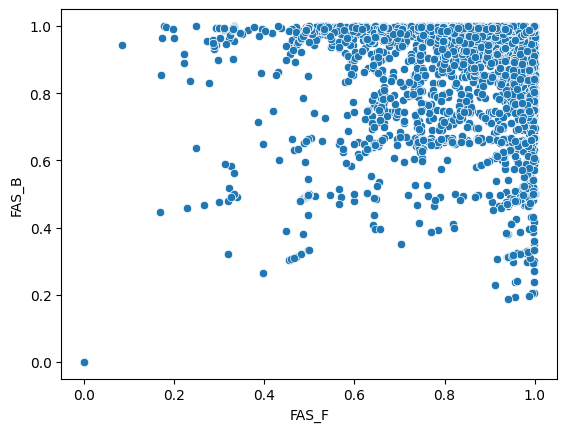

In [14]:
plot = sb.scatterplot(filtered_fa_augustus_sub, x='FAS_F', y='FAS_B')

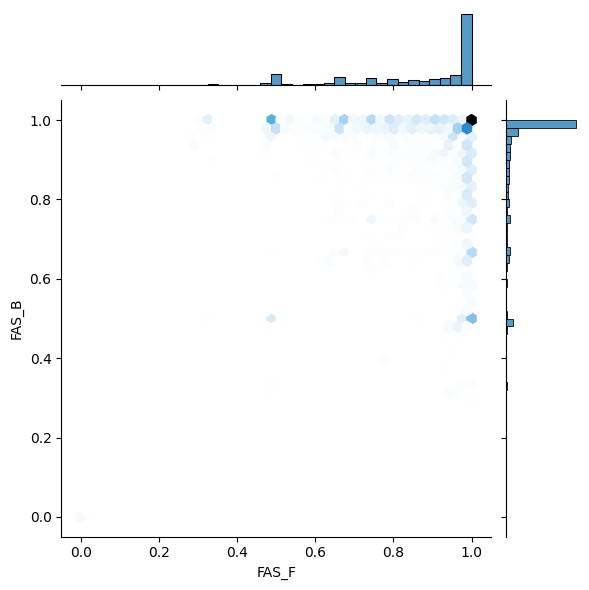

In [15]:
plot = sb.jointplot(data = filtered_fa_augustus_sub, x='FAS_F', y='FAS_B', kind="hex", vmin=0, vmax=600)

# Jointplot mit hexbin
#g = sns.jointplot(x=x, y=y, kind="hex", cmap="viridis", norm=LogNorm())

# Farblegende hinzufügen
#plt.colorbar(plot.ax_joint.collections[0], ax=plot.ax_joint, label='Number pairs')

# Plot anzeigen
plt.show()
#plt.savefig("FAS_dis_fA_Augustus.svg", bbox_inches='tight')

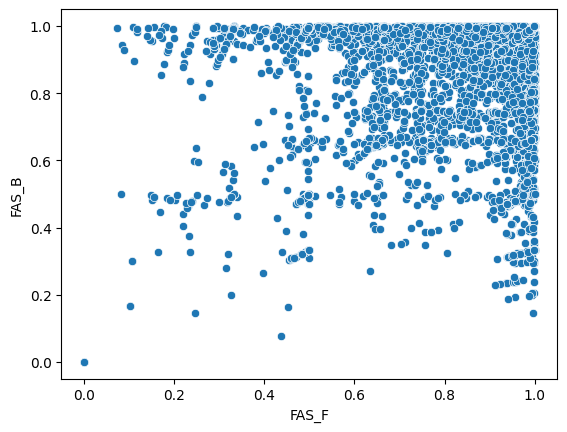

In [19]:
plot = sb.scatterplot(fa_augustus_sub, x='FAS_F', y='FAS_B')

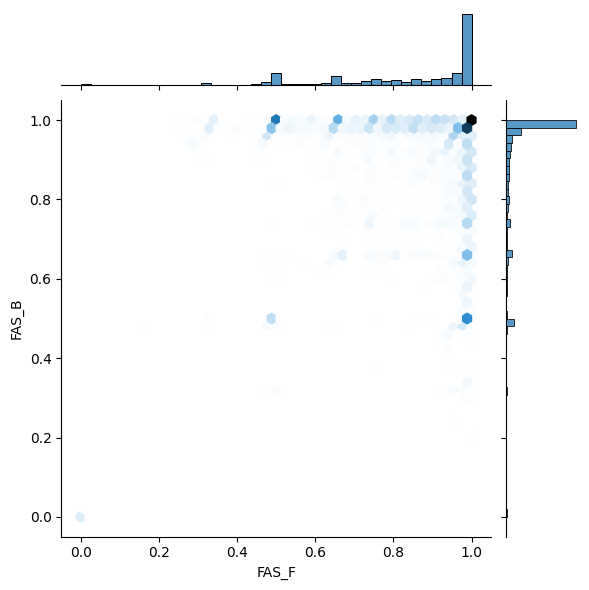

In [18]:
plot = sb.jointplot(data = fa_augustus_sub, x='FAS_F', y='FAS_B', kind="hex", vmin=0, vmax=600)

### Calculate FAS scores for protein-based pairs

In [5]:
# Create set of all occuring pairs for FAS calculation
union_all = set.union(*list_of_sets_ref)
print(len(list_of_sets_ref))
print(len(union_all))

13
10486


In [8]:
def create_ortho_groups(union_all, seed_genes):
    groups = {}
    for pair in union_all:
        i,j = pair
        if i in seed_genes:
            seed = i
            ortho = j
        else:
            seed = j
            ortho = i
        try:
            groups[seed].add(ortho)
        except KeyError:
            groups[seed] = set()
            groups[seed].add(ortho)
    return groups

### For genes found everywhere